In [1]:
#import packages
from time import time
from collections import Counter
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE, KMeansSMOTE
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.metrics import precision_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from matplotlib.pyplot import figure

In [2]:
#reading data
df = pd.read_csv("fake_job_postings.csv")
df_scraped = pd.read_csv("scraped_data.csv")

In [3]:
#Function to preprocess
def preprocess(df):
    df = df[df.location.notnull()]
    df= df[df.location.str.contains("US,")] 
    df = df[df.function.notnull()]
    return df

df = preprocess(df) 
df = df[df.function.isin(df['function'].value_counts()[df['function'].value_counts() > 260].index.tolist())]

In [4]:
df['function'].value_counts()

Customer Service          955
Sales                     951
Information Technology    765
Engineering               690
Administrative            394
Marketing                 390
Education                 292
Health Care Provider      264
Name: function, dtype: int64

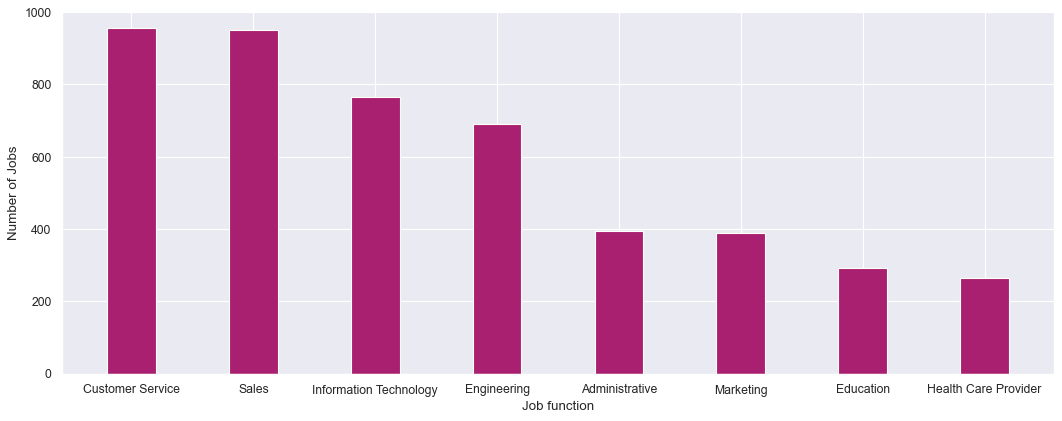

In [19]:
l = df['function'].value_counts()
figure(figsize=(16, 6), dpi=80)
plt.bar(l.index, l.values, width=0.4, color='#AA2070', align='center')
plt.ylabel("Number of Jobs")
plt.xlabel("Job function")
plt.show()

In [6]:
def text_preprocess(document):
    
    stemmer = WordNetLemmatizer()
    document = document.lower()
    words = nltk.word_tokenize(document)
    words = [stemmer.lemmatize(word) for word in words if word.isalpha()]
    words = [word for word in words if word not in stopwords.words("english")]
    sentence = " ".join(words)
    return sentence

textList = [text for text in df.description]
processed_data_text = [text_preprocess(text) for text in textList]
df_text = pd.DataFrame({'function': df.function.tolist() , 'description': processed_data_text})
df_text

,function,description
0,Marketing,james beard online food community curated reci...
1,Sales,company esri environmental system research ins...
2,Health Care Provider,job title itemization review managerlocation f...
3,Customer Service,customer service associate based phoenix az ri...
4,Information Technology,position developerjob location united cityus w...
...,...,...
4696,Information Technology,perform basic workstation trouble analysis inc...
4697,Engineering,looking integral player handful apps hit marke...
4698,Information Technology,position sql server dbalocation bay area cadur...
4699,Health Care Provider,crossroad treatment center south carolina curr...


In [7]:
def tokenizer(doc):
    return doc

#tf-idf vectorizer
def tfidf(df_text):
    vec = TfidfVectorizer(analyzer='word', tokenizer=tokenizer, preprocessor=tokenizer, token_pattern=None,
                      min_df=2, ngram_range=(1,2), stop_words='english')
    vec.fit(df_text.description)
    train_x, test_x, train_y, test_y = train_test_split(df_text.description, df_text.function, test_size=0.2, random_state=0)
    train_x = vec.transform(train_x)
    test_x = vec.transform(test_x)
    return train_x,train_y, test_x, test_y

train_x,train_y, test_x, test_y = tfidf(df_text)


/Users/shubhamgoyanka/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:388: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['b', 'c', 'd', 'e', 'f', 'g', 'h', 'k', 'l', 'm', 'n', 'o', 'p', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '


In [8]:
modelList = ['Naive Bayes', 'Random Forest', 'Linear SVM', 'Gradient Boosting']
accuracyList = []
f1List = []

In [9]:
#Naive Bayes Model
def naiveb(train_x, train_y, test_x, test_y):
    model = BernoulliNB()
    model.fit(train_x, train_y)
    y_pred = model.predict(test_x)
    print("Naive Bayes:::")
    print(classification_report(test_y, y_pred))
    return accuracy_score(test_y, y_pred ), f1_score(test_y, y_pred, average='weighted')
    
a_score, f_score = naiveb(train_x, train_y, test_x, test_y)
accuracyList.append(a_score)
f1List.append(f_score)

Naive Bayes:::
                        precision    recall  f1-score   support

        Administrative       0.43      0.36      0.39        78
      Customer Service       0.82      0.57      0.67       204
             Education       0.82      0.85      0.83        53
           Engineering       0.66      0.58      0.62       141
  Health Care Provider       0.70      0.86      0.77        50
Information Technology       0.53      0.46      0.49       164
             Marketing       0.42      0.67      0.52        60
                 Sales       0.55      0.74      0.64       191

              accuracy                           0.61       941
             macro avg       0.62      0.64      0.62       941
          weighted avg       0.63      0.61      0.61       941



In [10]:
#Random Forest Model
def rfmodel(train_x, train_y, test_x, test_y):
    model = RandomForestClassifier(n_estimators=500, max_depth=6, bootstrap=True, random_state=0,class_weight = 'balanced')
    model.fit(train_x, train_y)
    y_pred = model.predict(test_x)
    print("Random Forestl:::")
    print(classification_report(test_y, y_pred))
    return accuracy_score(test_y, y_pred,), f1_score(test_y, y_pred, average='weighted')
    
a_score, f_score = rfmodel(train_x, train_y, test_x, test_y)
accuracyList.append(a_score)
f1List.append(f_score)

Random Forestl:::
                        precision    recall  f1-score   support

        Administrative       0.64      0.45      0.53        78
      Customer Service       0.84      0.75      0.79       204
             Education       1.00      0.91      0.95        53
           Engineering       0.63      0.82      0.72       141
  Health Care Provider       0.75      0.94      0.83        50
Information Technology       0.74      0.56      0.64       164
             Marketing       0.53      0.78      0.63        60
                 Sales       0.80      0.81      0.81       191

              accuracy                           0.74       941
             macro avg       0.74      0.75      0.74       941
          weighted avg       0.75      0.74      0.74       941



In [11]:
#Linear SVM Model
def svmmodel(train_x, train_y, test_x, test_y):
    model = LinearSVC(random_state = 0, penalty = 'l1', dual = False)
    model.fit(train_x, train_y)
    y_pred = model.predict(test_x)
    print("SVM:::")
    print(classification_report(test_y, y_pred))
    return accuracy_score(test_y, y_pred), f1_score(test_y, y_pred, average='weighted')
    
a_score, f_score = svmmodel(train_x, train_y, test_x, test_y)
accuracyList.append(a_score)
f1List.append(f_score)

SVM:::
                        precision    recall  f1-score   support

        Administrative       0.65      0.46      0.54        78
      Customer Service       0.80      0.83      0.82       204
             Education       0.96      0.96      0.96        53
           Engineering       0.68      0.74      0.71       141
  Health Care Provider       0.89      0.96      0.92        50
Information Technology       0.76      0.68      0.72       164
             Marketing       0.67      0.67      0.67        60
                 Sales       0.82      0.88      0.85       191

              accuracy                           0.78       941
             macro avg       0.78      0.77      0.77       941
          weighted avg       0.77      0.78      0.77       941



/Users/shubhamgoyanka/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [12]:
#Gradient Boosting Model
def gbmodel(train_x, train_y, test_x, test_y):
    model = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)
    model.fit(train_x, train_y)
    y_pred = model.predict(test_x)
    print("Gradient Boosting:::")
    print(classification_report(test_y, y_pred))
    return accuracy_score(test_y, y_pred), f1_score(test_y, y_pred, average='weighted')
    
a_score, f_score = gbmodel(train_x, train_y, test_x, test_y)
accuracyList.append(a_score)
f1List.append(f_score)

Gradient Boosting:::
                        precision    recall  f1-score   support

        Administrative       0.47      0.42      0.45        78
      Customer Service       0.73      0.76      0.74       204
             Education       0.89      0.91      0.90        53
           Engineering       0.62      0.66      0.64       141
  Health Care Provider       0.71      0.24      0.36        50
Information Technology       0.66      0.65      0.65       164
             Marketing       0.39      0.60      0.47        60
                 Sales       0.77      0.74      0.75       191

              accuracy                           0.66       941
             macro avg       0.65      0.62      0.62       941
          weighted avg       0.67      0.66      0.66       941



In [13]:
accuracyList, f1List, modelList

([0.6078639744952179,
  0.7375132837407014,
  0.7757704569606801,
  0.6641870350690755],
 [0.6067222361172423,
  0.7353694777349024,
  0.7716621945815958,
  0.661104256078066],
 ['Naive Bayes', 'Random Forest', 'Linear SVM', 'Gradient Boosting'])

/Users/shubhamgoyanka/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


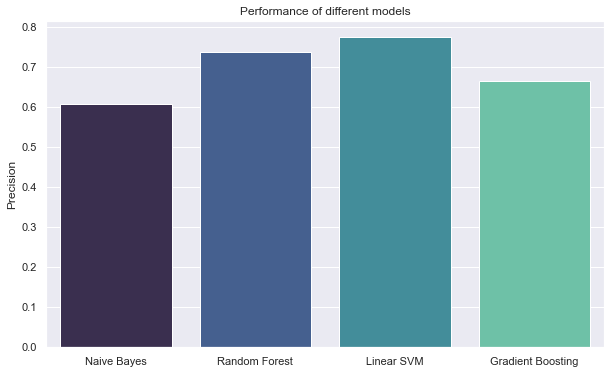

In [14]:
import seaborn
sns.set(rc={'figure.figsize':(10,6)})
tips = sns.load_dataset("tips")
g = seaborn.barplot(modelList,accuracyList, palette="mako", data= tips)
plt.title("Performance of different models")
plt.ylabel("Precision")
plt.show(g)

/Users/shubhamgoyanka/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


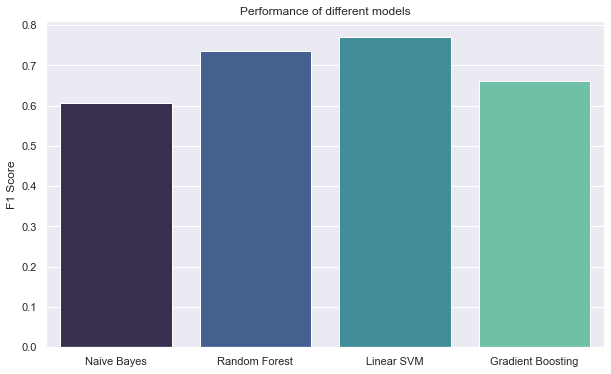

In [15]:
import seaborn
tips = sns.load_dataset("tips")
g = seaborn.barplot(modelList,f1List, palette="mako", data= tips)
plt.title("Performance of different models")
plt.ylabel("F1 Score")
plt.show(g)